In [6]:
# Give me the smallest object in the jsonl file
import json
import sys

# the file is python/train.jsonl
# so open the file, scan through it and give the one which has the shortest length for code_tokens, which a list of tokens

def smallestExample():
    smallest = None
    smallest_len = sys.maxsize

    with open("python/train.jsonl", "r") as f:
        for line in f:
            obj = json.loads(line)
            original_string_len = len(obj["original_string"])
            if original_string_len < smallest_len:
                smallest = obj
                smallest_len = original_string_len

    print(smallest)
    print(len(smallest["original_string"]))

smallestExample()

{'repo': 'kgori/treeCl', 'path': 'treeCl/bootstrap.py', 'func_name': 'hessian', 'original_string': 'def hessian(x, a):\n    """ J\'.J """\n    j = jac(x, a)\n    return j.T.dot(j)', 'language': 'python', 'code': 'def hessian(x, a):\n    """ J\'.J """\n    j = jac(x, a)\n    return j.T.dot(j)', 'code_tokens': ['def', 'hessian', '(', 'x', ',', 'a', ')', ':', 'j', '=', 'jac', '(', 'x', ',', 'a', ')', 'return', 'j', '.', 'T', '.', 'dot', '(', 'j', ')'], 'docstring': "J'.J", 'docstring_tokens': ['J', '.', 'J'], 'sha': 'fed624b3db1c19cc07175ca04e3eda6905a8d305', 'url': 'https://github.com/kgori/treeCl/blob/fed624b3db1c19cc07175ca04e3eda6905a8d305/treeCl/bootstrap.py#L78-L81', 'partition': 'train'}
75


In [24]:
# table which displays overall size of the dataset, the size of each test.jsonl, train.jsonl, and valid.jsonl



def datasetSize():
    # the dataset is in python/ directory and the files are train.jsonl, test.jsonl, valid.jsonl
    # so open each file and count the number of lines

    sizes_python = {}
    for file in ["train", "test", "valid"]:
        with open(f"python/{file}.jsonl", "r") as f:
            sizes_python[file] = len(f.readlines())

    # add an overall size which is all the sizes added together
    overall_size = sum(sizes_python.values())
    sizes_python["overall"] = overall_size


    # now do the same for javascript which is in javascript/ directory

    sizes_js = {"train": 0, "test": 0, "valid": 0}
    for file in ["train", "test", "valid"]:
        with open(f"javascript/{file}.jsonl", "r") as f:
            sizes_js[file] += len(f.readlines())

    overall_size = sum(sizes_js.values())
    sizes_js["overall"] = overall_size


    return sizes_js, sizes_python


datasetSize()

# now function which takes the two dictionaries and prints a beaufiful table,
# with columns columns of dataset, train, test, valid, overall
# and rows of python and javascript
sizes_js, sizes_python = datasetSize()

# Create a table
table = [["Dataset", "Train", "Test", "Valid", "Overall"],
         ["Python", sizes_python["train"], sizes_python["test"], sizes_python["valid"], sizes_python["overall"]],
         ["JavaScript", sizes_js["train"], sizes_js["test"], sizes_js["valid"], sizes_js["overall"]]]

from tabulate import tabulate

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒════════════╤═════════╤════════╤═════════╤═══════════╕
│ Dataset    │   Train │   Test │   Valid │   Overall │
╞════════════╪═════════╪════════╪═════════╪═══════════╡
│ Python     │  251820 │  14918 │   13914 │    280652 │
├────────────┼─────────┼────────┼─────────┼───────────┤
│ JavaScript │   93889 │   6483 │    8253 │    108625 │
╘════════════╧═════════╧════════╧═════════╧═══════════╛


Number of outliers in python/train.jsonl: 0
These are where the code_tokens are too large (>1000), so we skip them for this calculation.
[]
Number of outliers in javascript/train.jsonl: 1099
These are where the code_tokens are too large (>1000), so we skip them for this calculation.
[1010, 1140, 1370, 1672, 1036, 1309, 1144, 1349, 2459, 6625, 1617, 1571, 1180, 2216, 1152, 1842, 1111, 1022, 1391, 1076, 1329, 1356, 1125, 3008, 1730, 3571, 1774, 1381, 2079, 5384, 1184, 1671, 1061, 1040, 1288, 1637, 1488, 1057, 1197, 1650, 1672, 1113, 1947, 1748, 2523, 1125, 1921, 3270, 1503, 1852, 3352, 1844, 1106, 3928, 2106, 1172, 1367, 2082, 8119, 2860, 1285, 1245, 1010, 4197, 1316, 1329, 1671, 1612, 1580, 1622, 2281, 1623, 1133, 1183, 1546, 1570, 1172, 1276, 3185, 2221, 2612, 1017, 1140, 1086, 1401, 1155, 1072, 2002, 1735, 1636, 1113, 2604, 1030, 1008, 1678, 1100, 1080, 2113, 3293, 1298, 1303, 1821, 1188, 4920, 1293, 6102, 1286, 1159, 1480, 1843, 1205, 1036, 1419, 1330, 1262, 3036, 1299, 1498, 1642, 3

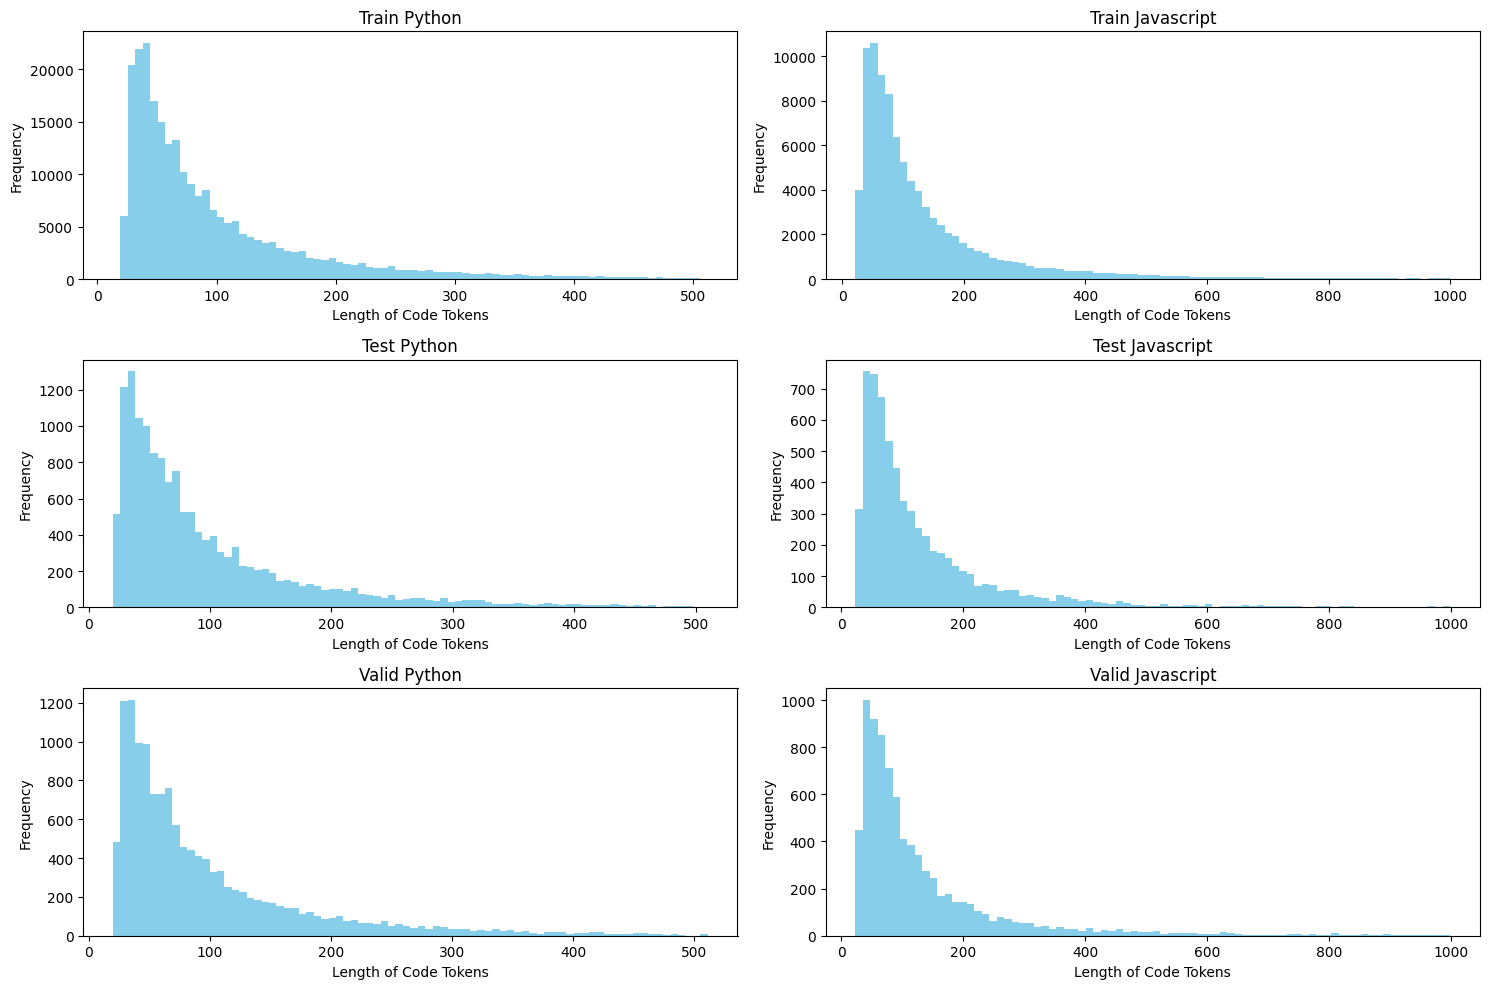

In [30]:
# now create a histogram of the length of code_tokens for for each dataset, for each of the train, test, valid, for each language
import json
import matplotlib.pyplot as plt

def extract_code_token_lengths(language, dataset):
    file_path = f"{language}/{dataset}.jsonl"
    code_token_lengths = []

    with open(file_path, "r") as f:
        outliers = 0
        outliers_size = []
        for line in f:
            data = json.loads(line)
            code_tokens = data.get("code_tokens", [])
            # if the code_tokens is too large, we will skip it
            if len(code_tokens) > 1000:
                # write down the number of outliers so bigger than 1000
                outliers += 1
                outliers_size.append(len(code_tokens))
                continue
            code_token_lengths.append(len(code_tokens))

    print(f"Number of outliers in {language}/{dataset}.jsonl: {outliers}")
    print("These are where the code_tokens are too large (>1000), so we skip them for this calculation.")
    # print the size of the outliers
    print(outliers_size)
    

    return code_token_lengths

datasets = ["train", "test", "valid"]
languages = ["python", "javascript"]

fig, axes = plt.subplots(nrows=len(datasets), ncols=len(languages), figsize=(15, 10))

for i, dataset in enumerate(datasets):
    for j, language in enumerate(languages):
        code_token_lengths = extract_code_token_lengths(language, dataset)
        axes[i, j].hist(code_token_lengths, bins=80, color='skyblue')
        axes[i, j].set_title(f"{dataset.capitalize()} {language.capitalize()}")
        axes[i, j].set_xlabel("Length of Code Tokens")
        axes[i, j].set_ylabel("Frequency")
 # Limit x-axis range for JavaScript histograms

plt.tight_layout()

# save the plot
plt.savefig("code_token_lengths_histogram.png")

plt.show()